# Regressão Logística
---
**Aula Prática 04**: Regressão Logística


**Objetivo**: Treinar um modelo de classificação utilizando regressão logística.

Banco de dados:


**Breast cancer wisconsin dataset**
Fonte: Disponível via `sklearn`

**Descrição do Dataset**
O conjunto de dados Breast Cancer Wisconsin contém características extraídas de imagens digitalizadas de aspirados por agulha fina (FNA) de massas mamárias. As características descrevem os núcleos das células presentes nas imagens.
* ID number: Identificador único para cada amostra.
* Diagnosis: Diagnóstico da amostra (0 = maligno, 1 = benigno).
* Características (3-32): Dez características reais calculadas para cada núcleo celular:

1. Radius: Média das distâncias do centro aos pontos no perímetro.
2. Texture: Desvio padrão dos valores de escala de cinza.
3. Perimeter: Perímetro do núcleo.
4. Area: Área do núcleo.
5. Smoothness: Variação local nos comprimentos dos raios.
6. Compactness: (Perímetro² / Área) - 1.0.
7. Concavity: Severidade das porções côncavas do contorno.
8. Concave Points: Número de porções côncavas do contorno.
9. Symmetry: Simetria do núcleo.
10. Fractal Dimension: ("Aproximação da linha costeira" - 1).

## Import das principais funções e leitura dos dados


---



In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets

In [2]:
data = datasets.load_breast_cancer()

In [3]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [4]:
target = pd.DataFrame(data.target, columns=['Target'])
df = pd.concat([df, target], axis=1)

In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [6]:
df.shape

(569, 31)

In [7]:
df.dtypes

mean radius                float64
mean texture               float64
mean perimeter             float64
mean area                  float64
mean smoothness            float64
mean compactness           float64
mean concavity             float64
mean concave points        float64
mean symmetry              float64
mean fractal dimension     float64
radius error               float64
texture error              float64
perimeter error            float64
area error                 float64
smoothness error           float64
compactness error          float64
concavity error            float64
concave points error       float64
symmetry error             float64
fractal dimension error    float64
worst radius               float64
worst texture              float64
worst perimeter            float64
worst area                 float64
worst smoothness           float64
worst compactness          float64
worst concavity            float64
worst concave points       float64
worst symmetry      

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [9]:
df.Target.mean()

np.float64(0.6274165202108963)

## Treino de modelo de regressão Logística
---


Para treinar um modelo de regressão logística, utilizaremos o pacote `sklearn`.


### Separação do banco entre treino e teste
O primeiro passo para se treinar um modelo é separar o banco entre treino e teste. Para isso utilizaremos a função train_test_split


``` python
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=15)
```
* X: DataFrame contendo as features do modelo.
* Y: DataFrame contendo a variável target.
* test_size: Percentual de dados que será utilizado para teste (neste caso, 30%).
* random_state: Controla a aleatoriedade da divisão dos dados, garantindo reprodutibilidade.

Separar os dados em treino e teste é crucial para que possamos treinar o modelo com um conjunto de dados e avaliá-lo com outro, garantindo uma avaliação imparcial da performance do modelo.



### Treinamento do Modelo
Agora que já possuímos os dados de treino e teste, vamos treinar o nosso modelo de regressão logística utilizando o módulo `LogisticRegression`:

``` python
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='none')
model.fit(X_train, Y_train)
```

No código acima, o objeto `model` é do tipo `LogisticRegression`. Ele será utilizado para ajustar o modelo, realizar predições e armazenar os coeficientes do modelo.

Para acessar os coeficientes e o intercepto do modelo, bem como realizar predições, utilizamos os seguintes métodos:

``` python
# Para acessar os coeficientes
model.coef_
# Para acessar o intercepto
model.intercept_
# Para fazer predições de classes
Y_predict = model.predict(X_test)
# Para fazer predições de probabilidade
Y_proba =model.predict_proba(X_test)
```


### Avaliação do modelo
Para avaliar o modelo treinado, utilizaremos as métricas discutidas na aula teórica:

``` python
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay


# Métricas acurácia, precisão, recall, f1-score
print(classification_report(Y_test, Y_predit))


# Matriz de confusão
confusion_matrix(Y_test, Y_predit)


# AUC
roc_auc = roc_auc_score(Y_test, Y_proba[:, 1])
fpr, tpr, thresholds = roc_curve(Y_test, Y_proba[:, 1])
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()
```


Também é possível obter cada uma das métricas individualmente:

``` python
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score


recall_score(Y_test, Y_predict, pos_label=1)
```


### Primeiro modelo

---

Exercício:
1. Separe os dados em treino e teste, utilizando 30% dos dados para o conjunto de teste. Faça a divisão com todas as variáveis.
2. Treine um modelo de regressão logística.
3. Qual é a interpretação do coeficiente para mean radius?
4. Qual é a interpretação do coeficiente para mean concavity?
5. Realize as análises de apuração do modelo.

Dica:
Para obter um DataFrame com os coeficientes e seus respectivos nomes, utilize o seguinte código:

``` python
pd.DataFrame(model.coef_.T, index=X_train.columns)
```

In [10]:
X = pd.DataFrame(data.data, columns=data.feature_names)
Y = data.target

#### Solução

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=15)

In [12]:
Y_train.mean()

np.float64(0.6256281407035176)

In [13]:
X_train.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
457,13.21,25.25,84.10,537.9,0.08791,0.05205,0.02772,0.02068,0.1619,0.05584,...,14.35,34.23,91.29,632.9,0.1289,0.1063,0.13900,0.06005,0.2444,0.06788
349,11.95,14.96,77.23,426.7,0.11580,0.12060,0.01171,0.01787,0.2459,0.06581,...,12.81,17.72,83.09,496.2,0.1293,0.1885,0.03122,0.04766,0.3124,0.07590
521,24.63,21.60,165.50,1841.0,0.10300,0.21060,0.23100,0.14710,0.1991,0.06739,...,29.92,26.93,205.70,2642.0,0.1342,0.4188,0.46580,0.24750,0.3157,0.09671
365,20.44,21.78,133.80,1293.0,0.09150,0.11310,0.09799,0.07785,0.1618,0.05557,...,24.31,26.37,161.20,1780.0,0.1327,0.2376,0.27020,0.17650,0.2609,0.06735
374,13.69,16.07,87.84,579.1,0.08302,0.06374,0.02556,0.02031,0.1872,0.05669,...,14.84,20.21,99.16,670.6,0.1105,0.2096,0.13460,0.06987,0.3323,0.07701


In [14]:
X_train.shape

(398, 30)

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty=None)
model.fit(X_train, Y_train)

c:\Users\55319\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty=None)

In [16]:
pd.DataFrame(model.coef_.T, index=X_train.columns)

,0
mean radius,1.303410
mean texture,-0.211982
mean perimeter,0.577481
mean area,-0.031617
mean smoothness,-0.043944
mean compactness,-0.224728
mean concavity,-0.320241
mean concave points,-0.133335
mean symmetry,-0.068992
mean fractal dimension,-0.014417


In [17]:
model.intercept_

array([0.23278488])

In [18]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, RocCurveDisplay

In [19]:
pred_class = model.predict(X_test)

In [20]:
pred_class

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0])

In [21]:
sum(Y_test)

np.int64(108)

In [22]:
len(Y_test)

171

In [23]:
print(classification_report(Y_test, pred_class))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88        63
           1       0.94      0.92      0.93       108

    accuracy                           0.91       171
   macro avg       0.90      0.91      0.91       171
weighted avg       0.91      0.91      0.91       171



In [24]:
confusion_matrix(Y_test, pred_class)

array([[57,  6],
       [ 9, 99]])

In [25]:
from sklearn.metrics import recall_score

In [26]:
recall_score(Y_test, pred_class)

np.float64(0.9166666666666666)

In [27]:
recall_score(Y_test, pred_class, pos_label=0)

np.float64(0.9047619047619048)

In [28]:
pred_prob = model.predict_proba(X_test)

In [40]:
roc_auc = roc_auc_score(Y_test, pred_prob[:, 1])
roc_auc

np.float64(0.9838330393885949)

In [39]:
pred_prob.shape

(171, 2)

In [31]:
pred_prob[1, :]

array([4.76182589e-04, 9.99523817e-01])

In [30]:
(pred_prob[:,1] > .5) - pred_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [33]:
pred_class

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0])

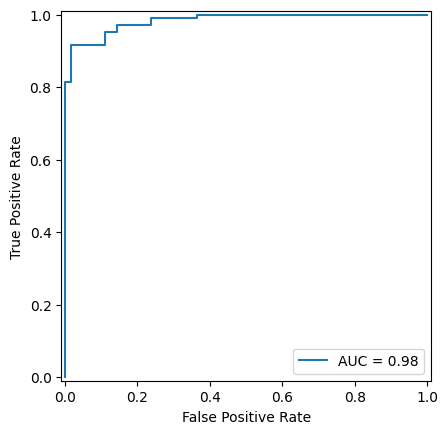

In [41]:
fpr, tpr, thresholds = roc_curve(Y_test, pred_prob[:, 1])
display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

Exercício:

* Busca o limiar em que se obtém a melhor acurácia.

Dica:
Para realizar a busca faça:
1. Gere o score de probabilidade
2. Percorra uma lista de valores de limiar e a cada valor calcule a acurácia
3. Obtenha o limiar com maior acurácia


Para acessar P(Y=1) faça predict_proba()[:, 1]

In [47]:
np.arange(0, 1, .1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

#### Solução

In [55]:
predict_proba = model.predict_proba(X_test)

In [56]:
acc_atual = 0
thr_otimo = 0

In [57]:
np.arange(0, 1, .1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

In [54]:
from sklearn.metrics import accuracy_score

In [58]:
for thr in np.arange(0, 1, .1):
  acc = accuracy_score(Y_test, predict_proba>=thr)
  print(f'Limiar')
  if acc >= acc_atual:
    thr_otimo = thr
    acc_atual = acc

ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [ ]:
predict_proba[:5, 1]

In [ ]:
acc_atual = accuracy_score(Y_test, predict_proba[:, 1] > 0.4)
thr_otimo = 0.4

In [ ]:
from sklearn.metrics import accuracy_score


predict_proba = model.predict_proba(X_test)[:, 1]
acc_atual = 0
thr_otimo = 0
for thr in np.arange(0, 1, .1):
  acc = accuracy_score(Y_test, predict_proba>=thr)
  if acc >= acc_atual:
    thr_otimo = thr
    acc_atual = acc

In [ ]:
acc_atual

In [ ]:
thr_otimo

In [ ]:
np.round(predict_proba[100:110],3)

In [ ]:
pred_class[100:110]

In [ ]:
predict_proba[100:110] >= .5

In [ ]:
predict_proba[100:110] >= .7

In [ ]:
import plotly.express as px

acc_lista = []
for thr in np.arange(0, 1, .001):
  acc_lista.append(accuracy_score(Y_test, predict_proba>=thr))

px.line(x=np.arange(0, 1, .001), y=acc_lista)

In [ ]:
confusion_matrix(Y_test, pred_class)

In [ ]:
confusion_matrix(Y_test, predict_proba>=.7)

Exercício:


* Construa um gráfico que analise os valores de precisão, recall e f1 score para cada limiar.


Dica:
Para realizar a busca faça:
1. Gere o score de probabilidade
2. Percorra uma lista de valores de limiar e a cada valor calcule as métricas e salve em uma lista


Construa um dataframe através dessa lista
Utilize a função de line do plotly.express para gerar o gráfico.


``` python
import plotly.express as px
px.line(df, x='limiar', y=['precisao', 'recall', 'f1'])
```

#### Solução

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score


predict_proba = model.predict_proba(X_test)[:, 1]
row = []
for thr in np.arange(0, 1, .1):
  pre = precision_score(Y_test, predict_proba>thr)
  rec = recall_score(Y_test, predict_proba>thr)
  f1 = f1_score(Y_test, predict_proba>thr)

  row.append((thr, pre, rec, f1))

df = pd.DataFrame(row, columns=['thr', 'pre', 'rec', 'f1'])
px.line(df, x='thr', y=['pre', 'rec'])

In [ ]:
from sklearn.metrics import f1_score, precision_score, recall_score


predict_proba = model.predict_proba(X_test)[:, 1]
row = []
for thr in np.arange(0, 1, .01):
  pre = precision_score(Y_test, predict_proba>thr, pos_label=0)
  rec = recall_score(Y_test, predict_proba>thr, pos_label=0)
  f1 = f1_score(Y_test, predict_proba>thr, pos_label=0)

  row.append((thr, pre, rec, f1))

df = pd.DataFrame(row, columns=['thr', 'pre', 'rec', 'f1'])
px.line(df, x='thr', y=['pre', 'rec'])